# HW3

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

## 1. Epsilon-Greedy Algorithm

### (1) Algorithm Formula (LaTeX):
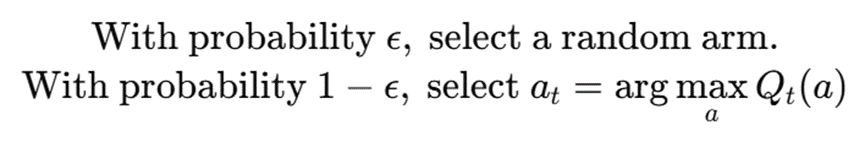

### (2) ChatGPT Prompt:
Explain how the epsilon-greedy algorithm balances exploration and exploitation in the multi-armed bandit problem.

### (3) Code and Plot:

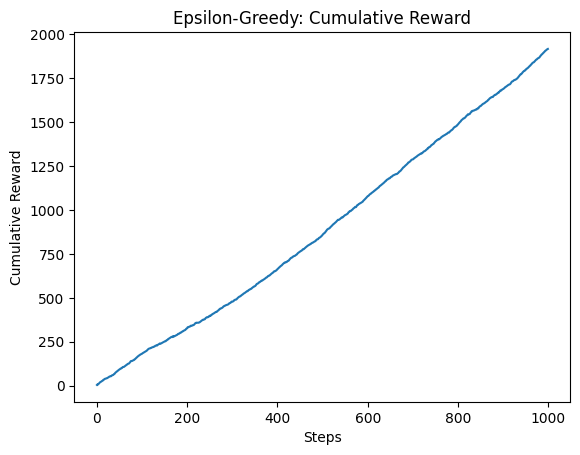

In [ ]:
np.random.seed(0)
k = 10
true_rewards = np.random.normal(0, 1, k)

n_steps = 1000
epsilon = 0.1
Q = np.zeros(k)
N = np.zeros(k)
rewards = []

for t in range(n_steps):
    if np.random.rand() < epsilon:
        a = np.random.randint(k)
    else:
        a = np.argmax(Q)
    reward = np.random.normal(true_rewards[a], 1)
    N[a] += 1
    Q[a] += (reward - Q[a]) / N[a]
    rewards.append(reward)

plt.plot(np.cumsum(rewards))
plt.title('Epsilon-Greedy: Cumulative Reward')
plt.xlabel('Steps')
plt.ylabel('Cumulative Reward')
plt.show()


### (4) Result Explanation (空間與時間分析):
•	時間複雜度：每一步選擇與更新皆為O(k)，共O(nk)

•	空間複雜度：需儲存每個臂的平均獎勵與選擇次數，為O(k)

o	優點：實作簡單，可根據 動態調整探索強度

o	缺點：固定的 無法自適應環境改變，初期探索較低效


## 2. UCB (Upper Confidence Bound) Algorithm

# (1) Algorithm Formula (LaTeX):
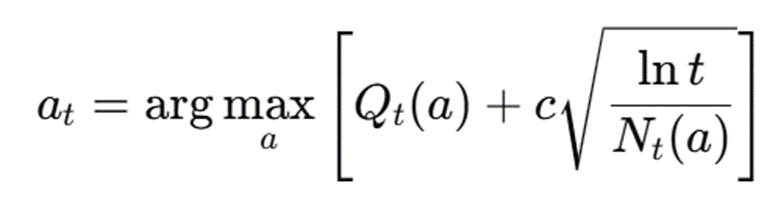

其中， 為 arm 的平均報酬， 為 arm 被選擇的次數， 為調控探索程度的常數。

### (2) ChatGPT Prompt:
Explain how the UCB algorithm uses confidence bounds to manage the exploration-exploitation trade-off in MAB problems.


### (3) Code and Plot:

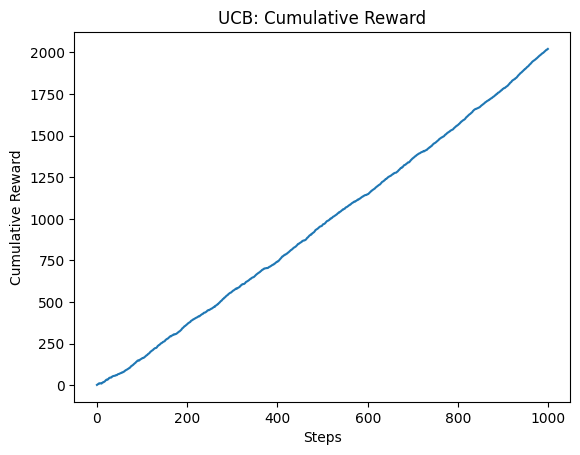

In [ ]:
np.random.seed(0)
k = 10
true_rewards = np.random.normal(0, 1, k)

n_steps = 1000
Q = np.zeros(k)
N = np.zeros(k)
rewards = []
c = 2

for t in range(1, n_steps + 1):
    ucb_values = Q + c * np.sqrt(np.log(t) / (N + 1e-5))
    a = np.argmax(ucb_values)
    reward = np.random.normal(true_rewards[a], 1)
    N[a] += 1
    Q[a] += (reward - Q[a]) / N[a]
    rewards.append(reward)

plt.plot(np.cumsum(rewards))
plt.title('UCB: Cumulative Reward')
plt.xlabel('Steps')
plt.ylabel('Cumulative Reward')
plt.show()

### (4) Result Explanation (空間與時間分析):
•	時間複雜度：每次選擇需計算所有臂的 UCB 值，為O(k)，共O(nk)

•	空間複雜度：需儲存每個臂的平均獎勵與選擇次數，為 O(k)

o	優點：UCB 自動平衡探索與利用，初期加強探索、後期聚焦於高報酬臂

o	缺點：對於初期選擇臂的估計可能不準，對 的選擇敏感


## 3. Softmax Algorithm

### (1) Algorithm Formula (LaTeX):
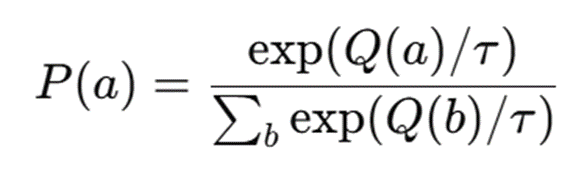

其中 為溫度參數，控制探索程度。

### (2) ChatGPT Prompt:
How does the Softmax algorithm use temperature to control the probability distribution over actions in a multi-armed bandit?


### (3) Code and Plot:

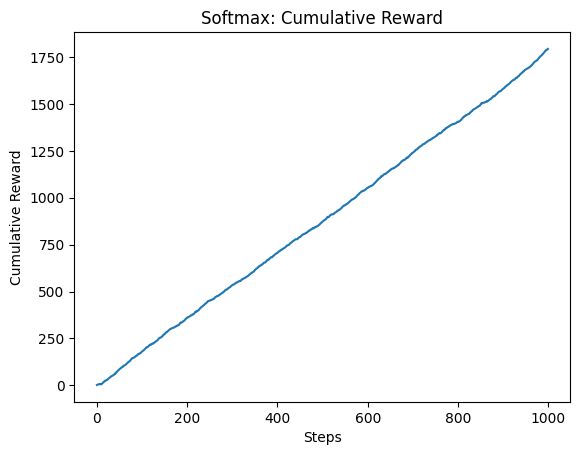

In [ ]:
np.random.seed(0)
k = 10
true_rewards = np.random.normal(0, 1, k)

n_steps = 1000
Q = np.zeros(k)
N = np.zeros(k)
rewards = []
tau = 0.5

def softmax(x):
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum()

for t in range(n_steps):
    probs = softmax(Q / tau)
    a = np.random.choice(np.arange(k), p=probs)
    reward = np.random.normal(true_rewards[a], 1)
    N[a] += 1
    Q[a] += (reward - Q[a]) / N[a]
    rewards.append(reward)

plt.plot(np.cumsum(rewards))
plt.title('Softmax: Cumulative Reward')
plt.xlabel('Steps')
plt.ylabel('Cumulative Reward')
plt.show()

### (4) Result Explanation (空間與時間分析):
•	時間複雜度：每次需計算 softmax 機率，為O(k)，共O(nk)

•	空間複雜度：儲存臂的平均報酬與次數，為O(k)

o	優點：比 epsilon-greedy 更平滑地探索次佳選項

o	缺點：需要選擇適當的溫度參數 ，過高或過低都會影響效能


## 4. Thompson Sampling Algorithm

### (1) Algorithm Formula (LaTeX):
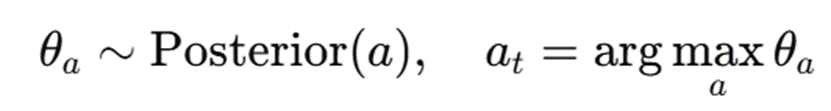

其中 是每個 arm 根據其 beta 分佈的隨機樣本。

### (2) ChatGPT Prompt:
How does Thompson Sampling use Bayesian posterior sampling to solve the exploration-exploitation dilemma in MAB problems?

### (3) Code and Plot:

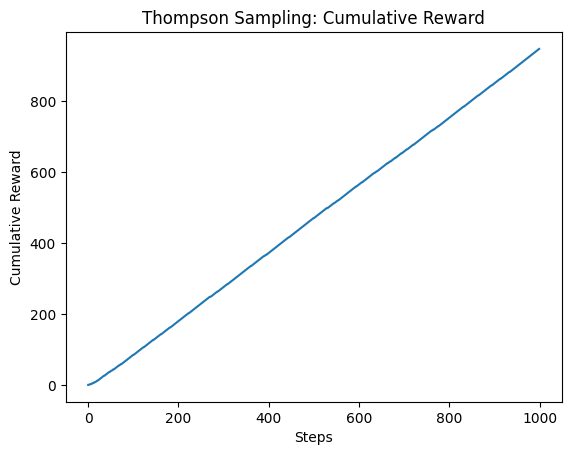

In [ ]:
np.random.seed(0)
k = 10
true_probs = np.random.rand(k)  # 使用 Bernoulli reward

n_steps = 1000
successes = np.zeros(k)
failures = np.zeros(k)
rewards = []

for t in range(n_steps):
    sampled_theta = np.random.beta(successes + 1, failures + 1)
    a = np.argmax(sampled_theta)
    reward = np.random.binomial(1, true_probs[a])
    if reward == 1:
        successes[a] += 1
    else:
        failures[a] += 1
    rewards.append(reward)

plt.plot(np.cumsum(rewards))
plt.title('Thompson Sampling: Cumulative Reward')
plt.xlabel('Steps')
plt.ylabel('Cumulative Reward')
plt.show()

(4) Result Explanation (空間與時間分析):
•	時間複雜度：每次需對每個 arm 取樣，為O(k)，共O(nk)

•	空間複雜度：需儲存每個 arm 的成功與失敗次數，為O(k)

o	優點：理論保證下的最佳演算法之一，自適應學習與探索

o	缺點：需對分布進行建模，對非伯努利環境需更複雜的建模


每個算法的累積回報、探索與利用之間的平衡

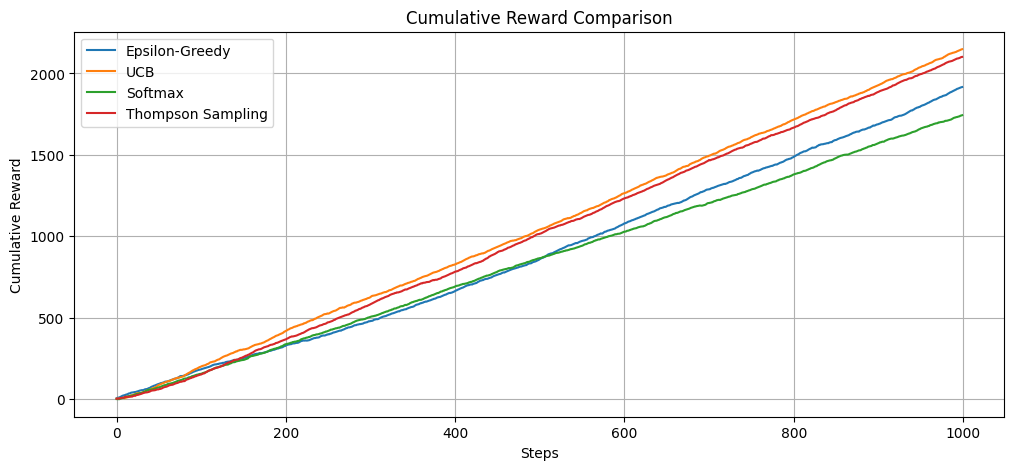

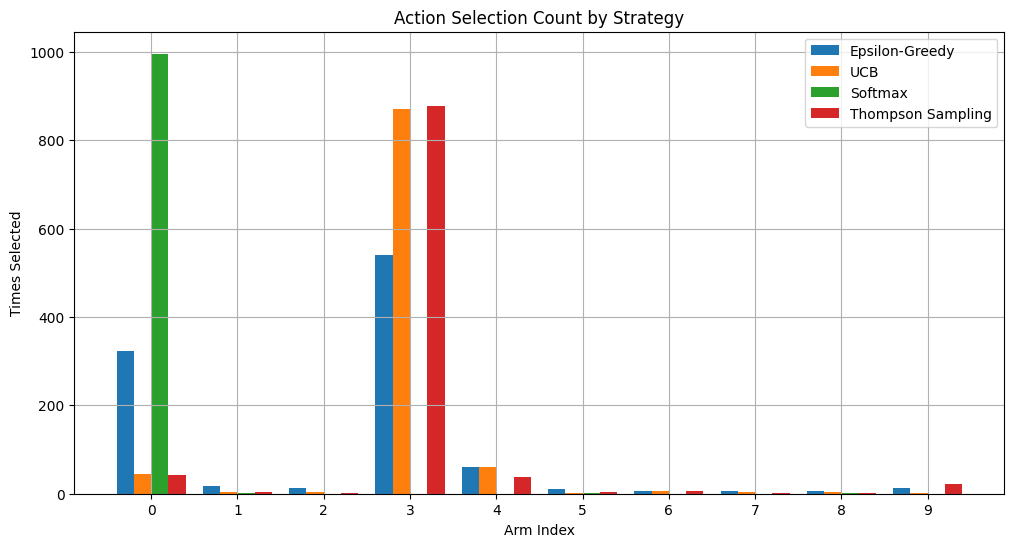

In [6]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)
k = 10  # 臂數
true_rewards = np.random.normal(0, 1, k)

n_steps = 1000
epsilon = 0.1
tau = 0.1  # Softmax 溫度參數

def run_epsilon_greedy():
    Q, N = np.zeros(k), np.zeros(k)
    rewards, actions = [], []
    for _ in range(n_steps):
        if np.random.rand() < epsilon:
            a = np.random.randint(k)
        else:
            a = np.argmax(Q)
        reward = np.random.normal(true_rewards[a], 1)
        N[a] += 1
        Q[a] += (reward - Q[a]) / N[a]
        rewards.append(reward)
        actions.append(a)
    return rewards, actions

def run_ucb():
    Q, N = np.zeros(k), np.zeros(k)
    rewards, actions = [], []
    for t in range(1, n_steps + 1):
        ucb_values = Q + np.sqrt(2 * np.log(t) / (N + 1e-5))
        a = np.argmax(ucb_values)
        reward = np.random.normal(true_rewards[a], 1)
        N[a] += 1
        Q[a] += (reward - Q[a]) / N[a]
        rewards.append(reward)
        actions.append(a)
    return rewards, actions

def run_softmax():
    Q, N = np.zeros(k), np.zeros(k)
    rewards, actions = [], []
    for _ in range(n_steps):
        exp_Q = np.exp(Q / tau)
        probs = exp_Q / np.sum(exp_Q)
        a = np.random.choice(k, p=probs)
        reward = np.random.normal(true_rewards[a], 1)
        N[a] += 1
        Q[a] += (reward - Q[a]) / N[a]
        rewards.append(reward)
        actions.append(a)
    return rewards, actions

def run_thompson_sampling():
    alpha, beta = np.ones(k), np.ones(k)
    rewards, actions = [], []
    for _ in range(n_steps):
        theta = np.random.beta(alpha, beta)
        a = np.argmax(theta)
        reward = np.random.normal(true_rewards[a], 1)
        if reward > 0:
            alpha[a] += 1
        else:
            beta[a] += 1
        rewards.append(reward)
        actions.append(a)
    return rewards, actions

# 執行所有演算法
results = {}
for name, func in [
    ('Epsilon-Greedy', run_epsilon_greedy),
    ('UCB', run_ucb),
    ('Softmax', run_softmax),
    ('Thompson Sampling', run_thompson_sampling)
]:
    rewards, actions = func()
    results[name] = {
        'rewards': rewards,
        'cumulative': np.cumsum(rewards),
        'actions': np.bincount(actions, minlength=k)
    }

# 🎨 畫圖：累積回報比較圖
plt.figure(figsize=(12, 5))
for name, data in results.items():
    plt.plot(data['cumulative'], label=name)
plt.title('Cumulative Reward Comparison')
plt.xlabel('Steps')
plt.ylabel('Cumulative Reward')
plt.legend()
plt.grid(True)
plt.show()

# 🎨 畫圖：每個策略選擇各臂次數
plt.figure(figsize=(12, 6))
bar_width = 0.2
x = np.arange(k)
for i, (name, data) in enumerate(results.items()):
    plt.bar(x + i * bar_width, data['actions'], width=bar_width, label=name)
plt.title('Action Selection Count by Strategy')
plt.xlabel('Arm Index')
plt.ylabel('Times Selected')
plt.xticks(x + bar_width * 1.5, range(k))
plt.legend()
plt.grid(True)
plt.show()


每個算法的每步平均報酬圖、累積回報重複實驗100次取平均

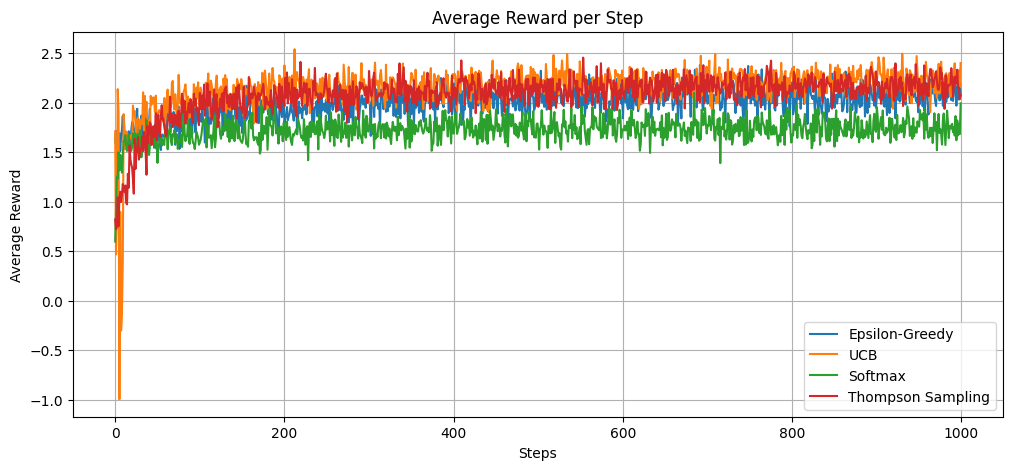

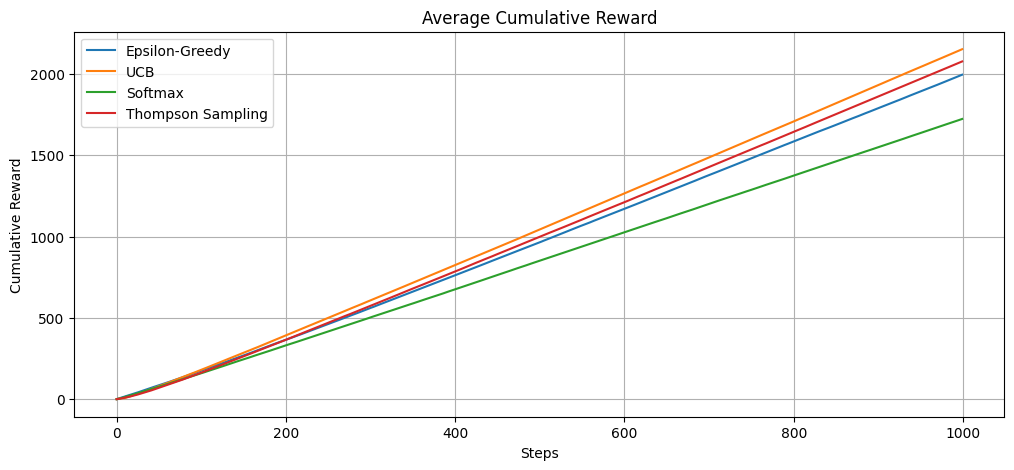

In [7]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)
k = 10  # 臂數
true_rewards = np.random.normal(0, 1, k)

n_steps = 1000
n_runs = 100
epsilon = 0.1
tau = 0.1  # Softmax 溫度

def run_epsilon_greedy():
    Q, N = np.zeros(k), np.zeros(k)
    rewards, actions = [], []
    for _ in range(n_steps):
        if np.random.rand() < epsilon:
            a = np.random.randint(k)
        else:
            a = np.argmax(Q)
        reward = np.random.normal(true_rewards[a], 1)
        N[a] += 1
        Q[a] += (reward - Q[a]) / N[a]
        rewards.append(reward)
        actions.append(a)
    return rewards, actions

def run_ucb():
    Q, N = np.zeros(k), np.zeros(k)
    rewards, actions = [], []
    for t in range(1, n_steps + 1):
        ucb_values = Q + np.sqrt(2 * np.log(t) / (N + 1e-5))
        a = np.argmax(ucb_values)
        reward = np.random.normal(true_rewards[a], 1)
        N[a] += 1
        Q[a] += (reward - Q[a]) / N[a]
        rewards.append(reward)
        actions.append(a)
    return rewards, actions

def run_softmax():
    Q, N = np.zeros(k), np.zeros(k)
    rewards, actions = [], []
    for _ in range(n_steps):
        exp_Q = np.exp(Q / tau)
        probs = exp_Q / np.sum(exp_Q)
        a = np.random.choice(k, p=probs)
        reward = np.random.normal(true_rewards[a], 1)
        N[a] += 1
        Q[a] += (reward - Q[a]) / N[a]
        rewards.append(reward)
        actions.append(a)
    return rewards, actions

def run_thompson_sampling():
    alpha, beta = np.ones(k), np.ones(k)
    rewards, actions = [], []
    for _ in range(n_steps):
        theta = np.random.beta(alpha, beta)
        a = np.argmax(theta)
        reward = np.random.normal(true_rewards[a], 1)
        if reward > 0:
            alpha[a] += 1
        else:
            beta[a] += 1
        rewards.append(reward)
        actions.append(a)
    return rewards, actions

# 執行多次實驗
all_results = {
    'Epsilon-Greedy': [],
    'UCB': [],
    'Softmax': [],
    'Thompson Sampling': [],
}

for run in range(n_runs):
    for name, func in [
        ('Epsilon-Greedy', run_epsilon_greedy),
        ('UCB', run_ucb),
        ('Softmax', run_softmax),
        ('Thompson Sampling', run_thompson_sampling)
    ]:
        rewards, _ = func()
        all_results[name].append(rewards)

# 平均結果處理
avg_rewards = {}
cum_rewards = {}
for name, runs in all_results.items():
    avg_rewards[name] = np.mean(runs, axis=0)
    cum_rewards[name] = np.cumsum(avg_rewards[name])

# 🎨 平均每步報酬圖
plt.figure(figsize=(12, 5))
for name, rewards in avg_rewards.items():
    plt.plot(rewards, label=name)
plt.title('Average Reward per Step')
plt.xlabel('Steps')
plt.ylabel('Average Reward')
plt.legend()
plt.grid(True)
plt.show()

# 🎨 平均累積報酬圖
plt.figure(figsize=(12, 5))
for name, cumulative in cum_rewards.items():
    plt.plot(cumulative, label=name)
plt.title('Average Cumulative Reward')
plt.xlabel('Steps')
plt.ylabel('Cumulative Reward')
plt.legend()
plt.grid(True)
plt.show()
